# Handwritten Letter or Digit Recognition Model using EMNIST

This notebook demonstrates how to build, train, and save a handwritten letter recognition model using the EMNIST dataset.

## Step 1: Import Required Libraries

In [2]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Step 2: Load the EMNIST Dataset

In [3]:
# Load EMNIST dataset
from emnist import extract_training_samples, extract_test_samples

# Use 'byclass' to include all 62 classes (digits, uppercase, and lowercase letters)
x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

# Reshape and normalize the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Adjust labels to be zero-indexed (0 to 61)
y_train = y_train - 1
y_test = y_test - 1

# Ensure all labels are within the valid range (0 to 61)
y_train = np.clip(y_train, 0, 61)
y_test = np.clip(y_test, 0, 61)

# Convert labels to one-hot encoding
num_classes = 62  # EMNIST 'byclass' has 62 classes (0-9, A-Z, a-z)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Step 3: Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

## Step 4: Build the Model

In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Step 5: Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 85s 19ms/step - accuracy: 0.7337 - loss: 0.9130 - val_accuracy: 0.8428 - val_loss: 0.4410
Epoch 2/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 81s 19ms/step - accuracy: 0.8503 - loss: 0.4166 - val_accuracy: 0.8533 - val_loss: 0.4028
Epoch 3/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 77s 18ms/step - accuracy: 0.8587 - loss: 0.3866 - val_accuracy: 0.8572 - val_loss: 0.3913
Epoch 4/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 79s 18ms/step - accuracy: 0.8634 - loss: 0.3675 - val_accuracy: 0.8633 - val_loss: 0.3737
Epoch 5/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 76s 17ms/step - accuracy: 0.8674 - loss: 0.3554 - val_accuracy: 0.8589 - val_loss: 0.3832
Epoch 6/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 90s 21ms/step - accuracy: 0.8691 - loss: 0.3473 - val_accuracy: 0.8644 - val_loss: 0.3686
Epoch 7/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 88s 20ms/step - accuracy: 0.8718 - loss: 0.3385 - val_accuracy: 0.8665 - val_loss: 0.3670
Epoch 8/10
4363/4363 ━━━━━━━━━━━━━━━━━━━━ 87s 20ms/step - accuracy: 0.8738 -

## Step 6: Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8646 - loss: 0.3687
Test accuracy: 0.8651


## Step 7: Save the Model

In [7]:
# Save the model weights
model.save('handwritten_recognition_model.keras')
print("Model saved as 'handwritten_recognition_model.keras'")

Model saved as 'handwritten_recognition_model.keras'


## Step 8: Visualize Training Results

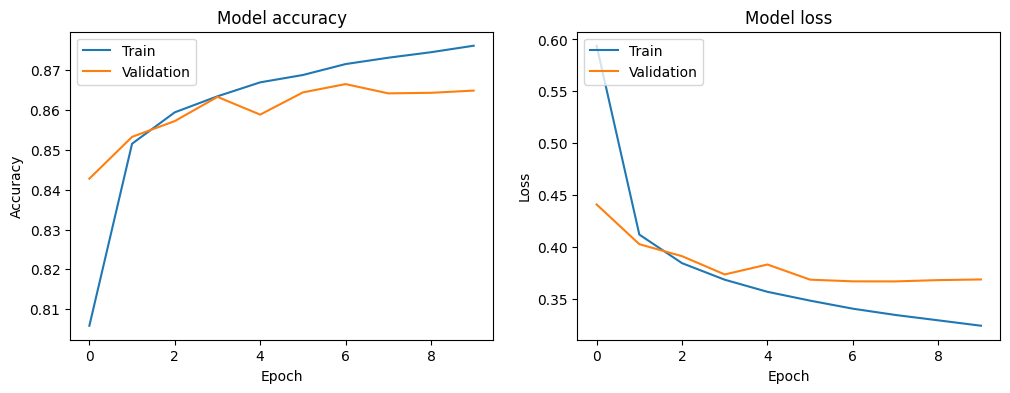

In [12]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Step 9: Predict and Visualize a Test Sample

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


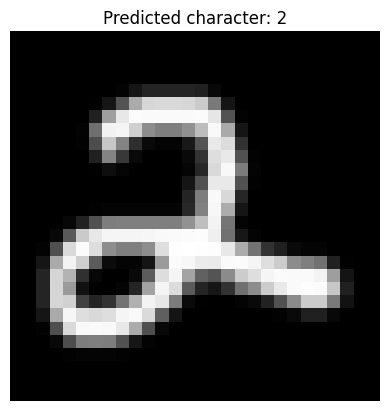

In [9]:
# Make a prediction on a test sample
sample = x_test[10].reshape(1, 28, 28, 1)  # Reshape for model input
prediction = model.predict(sample)  # Get model predictions
predicted_class = np.argmax(prediction) + 1  # Get the predicted class index

# Map the predicted class index to the corresponding character
# EMNIST 'byclass' mapping: 0-9 (digits), 10-35 (A-Z), 36-61 (a-z)
if predicted_class < 10:
    predicted_char = str(predicted_class)  # Digits 0-9
elif predicted_class < 36:
    predicted_char = chr(predicted_class + 55)  # Uppercase letters A-Z
else:
    predicted_char = chr(predicted_class + 61)  # Lowercase letters a-z

# Display the image
plt.imshow(x_test[10].reshape(28, 28), cmap='gray')
plt.title(f"Predicted character: {predicted_char}")
plt.axis('off')  # Hide the axes
plt.show()

## Step 10: Predict and Visualize a Custom Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


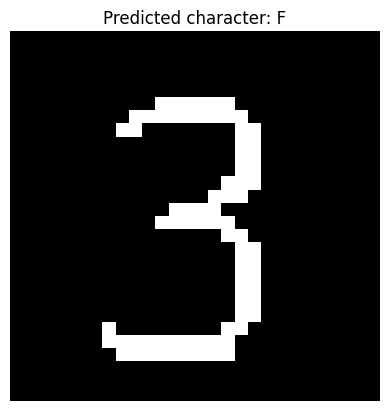

In [19]:
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps

# Load the custom image
image_path = "images/3.png"  # Replace with the path to your image
img = Image.open(image_path).convert('L')  # Convert to grayscale

# Invert the colors to match EMNIST format
img = ImageOps.invert(img)

# Preprocess the image
img = img.resize((28, 28))  # Resize to 28x28
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = img_array.reshape((28, 28))  # Reshape to (28, 28)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
img_array = img_array.reshape((1, 28, 28, 1))  # Reshape to (1, 28, 28, 1)

# Make a prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction) + 1  # Get the predicted class index

# Map the predicted class index to the corresponding character
# EMNIST 'byclass' mapping: 0-9 (digits), 10-35 (A-Z), 36-61 (a-z)
if predicted_class < 10:
    predicted_char = str(predicted_class)  # Digits 0-9
elif predicted_class < 36:
    predicted_char = chr(predicted_class + 55)  # Uppercase letters A-Z
else:
    predicted_char = chr(predicted_class + 61)  # Lowercase letters a-z

# Display the image and prediction
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted character: {predicted_char}")
plt.axis('off')
plt.show()